In [1]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import community as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
from IPython.display import display_html
def display_df_sbs(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def gen_df_between(dataframe, t1, t2):
    return df[((df['start'] >= t1) & (df['start'] < t2)) 
              | ((df['end'] >= t1) & (df['end'] < t2)) 
              | ((df['start'] < t1) & (df['end'] >= t2))]

In [3]:
df = pd.read_table("./data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ", names = ["src", "trg", "start", "end"])

In [4]:
df['start'] = pd.to_datetime(df['start'], unit = 's') #convert Unix timestamps to date time, utc = 0
df['end'] = pd.to_datetime(df['end'], unit = 's')

# Pagerank

## Static Network Analysis

In this section we start by creating a graph from the data. We create this graph by ignoring the time data. We start by creating a directed graph which doesn't allow for parallel edges and we consider all edges over the total timespan of the data. Next we run the pagerank algorithm with a dampening parameter of 0.85. The dampening parameter represents the likelihood of clicking a link on the webpage. With a dampening parameter of 0.85 we indicate that there is a 85% of clicking a link on the webpage and 15% of going to a random other node in the graph. We calculate the page rank using the power iteration method.

In [5]:
G = nx.from_pandas_dataframe(df, 'src', 'trg', create_using=nx.DiGraph())
pr = nx.pagerank(G, alpha=0.85)

Next we create some utility methods for displaying the data:

In [6]:
def gen_df_from_graph(graph, pagerank):
    df_edge_in = pd.DataFrame(list(graph.in_degree), columns=['node', 'in edges'])
    df_edge_out = pd.DataFrame(list(graph.out_degree), columns=['node', 'out edges'])
    df_rank = pd.DataFrame(list(pagerank.items()), columns=['node', 'score']).sort_values(by=['score'], ascending=False)
    df_temp = pd.merge(df_rank, df_edge_in, on='node')
    df_total = pd.merge(df_temp, df_edge_out, on='node')
    df_total.index = df_total.index + 1
    df_total.columns.name = 'rank'
    return df_total

def gen_df_from_node(graph, node):
    df_pred = pd.DataFrame(list(graph.predecessors(node)), columns=['node'])
    scores = {}
    out_edges = {}
    for n in graph.predecessors(node):
        out_edges[n] = len(graph.out_edges(n))
        scores[n] = pr.get(n)
    df_out_edges = pd.DataFrame(list(out_edges.items()), columns=['node', 'out edges'])     
    df_score = pd.DataFrame(list(scores.items()), columns=['node', 'score']).sort_values(by=['score'], ascending=False)
    df_temp = pd.merge(df_score, df_pred, on='node')
    df_total = pd.merge(df_temp, df_out_edges, on='node')
    df_total.index = df_total.index + 1
    df_total.columns.name = node
    return df_total

def gen_sum_inc(graph, node):
    summation = 0
    for n in graph.predecessors(node):
        summation += pr.get(n)
    return summation

We display the highest, middle and lowest 10 ranked pages:

In [7]:
graph_df = gen_df_from_graph(G, pr)
display_df_sbs(graph_df.head(10), graph_df.iloc[339448 : 339458], graph_df.tail(10))

rank,node,score,in edges,out edges
1,149,0.002692,9655,545
2,146,0.001760,9264,0
3,394,0.001724,10521,1777
4,3546,0.001287,8561,0
5,15,0.001232,5308,609
6,363,0.001160,5749,1029
7,9416,0.001093,2899,0
8,10645,0.001071,2680,12
9,216,0.001043,5201,732
10,125,0.001040,6239,533


The data shows a big different between the high and low ranking pages. The high ranking pages have a lot more incoming edges and a lot more outgoing edges although not all of them have a lot of outgoing edges. This makes sense because the amount of outgoing edges shouldn't directly affect the pagerank. The incoming edges on the other hand does affect the page rank in general. If a page is linked more often it is more likely to end up higher in the pagerank.

Next we compare two of the top ranking nodes (146 and 3546) to see what makes one of them rank better than the other. We do that by showing the nodes that link to 146 and 3546 and sort them by score:

In [8]:
df_146 = gen_df_from_node(G, 146)
df_3546 = gen_df_from_node(G, 3546)
display_df_sbs(df_146.head(), df_3546.head())
print("Summation incoming node score for node 146: {sum}".format(sum=gen_sum_inc(G, 146)))
print("Summation incoming node score for node 3546: {sum}".format(sum=gen_sum_inc(G, 3546)))

146,node,score,out edges
1,394,0.001724,1777
2,15,0.001232,609
3,216,0.001043,732
4,125,0.001040,533
5,740,0.000940,149
3546,node,score,out edges
1,7219,0.000349,46
2,3539,0.000343,4
3,7191,0.000131,2
4,7127,0.000125,101


Summation incoming node score for node 146: 0.06398768016680219
Summation incoming node score for node 3546: 0.009957472206417262


We can see that both nodes are probably not in the same community since in the top 5 best scoring nodes that link to it, none of them are the same. It is interesting to see that the summation of the scores of 3546 is a lot lower than 146. The reason why the pagerank of 3546 is so high is because the nodes that link to 3546 have a lot less outgoing edges than the nodes that link to 149.

### Comminity detection and pagerank

Next we compare pagerank to communities. We will check if we can find relations between the community size and pagerank. We partition the graph into communities using the louvain method. To calculate communities we need to create an undirected graph. We consider all edges again over de total timespan of the data.

In [9]:
G_und = nx.from_pandas_dataframe(df, 'src', 'trg')
part = cm.community_louvain.best_partition(G_und)

Next we create some utility methods for displaying the data:

In [10]:
def gen_df_community__node_pagerank(graph, graph_und, pagerank, partition):
    df_community = pd.DataFrame({'node': graph_und.nodes, 'community': list(partition.values())})
    df_community.head()
    df_edge_in = pd.DataFrame(list(graph.in_degree), columns=['node', 'in edges'])
    df_edge_out = pd.DataFrame(list(graph.out_degree), columns=['node', 'out edges'])
    df_rank = pd.DataFrame(list(pagerank.items()), columns=['node', 'score']).sort_values(by=['score'], ascending=False)
    df_temp = pd.merge(df_rank, df_edge_in, on='node')
    df_total = pd.merge(df_temp, df_edge_out, on='node')
    df_final = pd.merge(df_total, df_community, on='node')
    df_final.index = df_final.index + 1
    df_final.columns.name = 'rank'
    return df_final

def gen_df_community_pagerank(pagerank, partition):
    d_sum = {}
    d_count = {}
    d_avg = {}
    for n, c in partition.items():
        if c in d_sum:
            d_sum[c] += pagerank[n]
            d_count[c] += 1
        else:
            d_sum[c] = pagerank[n]
            d_count[c] = 1
    for c, r in d_sum.items():
        d_avg[c] = d_sum[c] / d_count[c]
    
    df_c_avg = pd.DataFrame(list(d_avg.items()), columns=['community', 'avg rank']).sort_values(by=['avg rank'], ascending=False)
    df_c_count = pd.DataFrame(list(d_count.items()), columns=['community', 'size'])
    df_final = pd.merge(df_c_avg, df_c_count, on='community')
    df_final.index = df_final.index + 1
    df_final.columns.name = 'rank'
    return df_final

We display the community for each node:

In [11]:
df_com_pr = gen_df_community__node_pagerank(G, G_und, pr, part)
display_df_sbs(df_com_pr.head(10), df_com_pr.iloc[339448 : 339458], df_com_pr.iloc[509448 : 509458], df_com_pr.tail(10))

rank,node,score,in edges,out edges,community
1,149,0.002692,9655,545,0
2,146,0.001760,9264,0,0
3,394,0.001724,10521,1777,9
4,3546,0.001287,8561,0,5
5,15,0.001232,5308,609,0
6,363,0.001160,5749,1029,3
7,9416,0.001093,2899,0,21
8,10645,0.001071,2680,12,3
9,216,0.001043,5201,732,0
10,125,0.001040,6239,533,0


From this data we can't clearly tell if one of the communities is ranked higher on the pagerank than other communities.

In [12]:
df_community_pagerank = gen_df_community_pagerank(pr, part)
display_df_sbs(df_community_pagerank.head(10), df_community_pagerank.tail(10))

rank,community,avg rank,size
1,1186,0.000005,9
2,5061,0.000003,3
3,799,0.000003,4
4,1064,0.000002,10
5,1182,0.000002,5
6,681,0.000002,3
7,1596,0.000002,2
8,2336,0.000002,2
9,2036,0.000002,2
10,196,0.000002,9


In the contrary to one of the previous assignements the data shows no evidence that there is any correlation between community size and the pagerank of the nodes. This is interesting because one would expect that nodes in a bigger community is more likely to have an high amount and high quality incoming nodes. That doesn't seem to be the case in this network.

## Temporal Network Analysis

We will now look at a temporal analysis of the pagerank algorithm on the network. We start by generating the pagerank for every year.

In [13]:
def generate_yearly_pagerank(start, stop):
    listing = []
    for i in range(start, stop + 1):
        dataframe = gen_df_between(df, datetime.datetime(i, 1, 1, 0, 0, 0), datetime.datetime(i + 1, 1, 1, 0, 0, 0))
        graph = nx.from_pandas_dataframe(dataframe, 'src', 'trg', create_using=nx.DiGraph())
        pr = nx.pagerank(graph, alpha=0.85)
        listing.append((graph, pr))
    return listing

In [14]:
graph_pr = generate_yearly_pagerank(2002, 2012)

In [15]:
yearly_dataframes = []
for i in range(0, 10):
    dataframe = gen_df_from_graph(graph_pr[i][0], graph_pr[i][1])
    dataframe.columns.name = str(2002 + i) + ' - rank'
    yearly_dataframes.append(dataframe)
display_df_sbs(
    yearly_dataframes[0].head(),
    yearly_dataframes[1].head(),
    yearly_dataframes[2].head(),
    yearly_dataframes[3].head(),
    yearly_dataframes[4].head(),
    yearly_dataframes[5].head(),
    yearly_dataframes[6].head(),
    yearly_dataframes[7].head(),
    yearly_dataframes[8].head(),
    yearly_dataframes[9].head(),
)    

2002 - rank,node,score,in edges,out edges
1,26251,0.009035,1136,62
2,26254,0.008456,1019,47
3,42583,0.004995,366,24
4,696,0.002048,340,169
5,700,0.001992,332,145
2003 - rank,node,score,in edges,out edges
1,26251,0.003635,2596,62
2,394,0.002010,1023,113
3,26254,0.001687,1143,50
4,149,0.001434,657,87


From the static analyses we saw that node 149 was the highest ranked node followed by 146. On a year to year basis however, node 3546 maintained its position at the top for the longest time. The top node in the static network analyses (149) only appears twice in the top 5 of the yearly analyses. A reason for this is that 149 most likely has a lot of 'good' edges pointing to it but those only lived for a short time. The static analyses didn't take into account parallel edges, it neglects parallel edges and the longevity of the edges.

We will now look at the top 5 nodes from the statistical network analyses and track them on a yearly basis:

In [16]:
def get_top_5_pagerank(dataframe):
    return dataframe[((dataframe['node'] == 149) | (dataframe['node'] == 146)  | (dataframe['node'] == 394) 
                      | (dataframe['node'] == 3546) | (dataframe['node'] == 15))]

In [17]:
display_df_sbs(
    get_top_5_pagerank(yearly_dataframes[0]).head(),
    get_top_5_pagerank(yearly_dataframes[1]).head(),
    get_top_5_pagerank(yearly_dataframes[2]).head(),
    get_top_5_pagerank(yearly_dataframes[3]).head(),
    get_top_5_pagerank(yearly_dataframes[4]).head(),
    get_top_5_pagerank(yearly_dataframes[5]).head(),
    get_top_5_pagerank(yearly_dataframes[6]).head(),
    get_top_5_pagerank(yearly_dataframes[7]).head(),
    get_top_5_pagerank(yearly_dataframes[8]).head(),
    get_top_5_pagerank(yearly_dataframes[9]).head(),
)    

2002 - rank,node,score,in edges,out edges
13,394,0.000618,104,67
41,149,0.000299,61,68
50,15,0.000277,66,110
554,146,0.000127,22,0
2003 - rank,node,score,in edges,out edges
2,394,0.002010,1023,113
4,149,0.001434,657,87
6,15,0.000860,573,193
35,146,0.000430,164,0
2004 - rank,node,score,in edges,out edges


Here it clearly shows why some nodes are ranked worse on the statistic network pagerank. Node 3546 which looked really promising in the yearly based pagerank didn't even exist in 2002 and 2003. Also does its pagerank drop significantly after 2009. Meanwhile node 149 is ranked high on the yearly pagerank consistently. Another node which is consistently ranked high on every years pagerank is node 394, in most cases it ranks higher than 149. The explanation for why 394 is only ranked third on the static network pagerank lies with double edges. If the edges pointing to 394 don't change as much this will lead to a low amount of incoming edges over the whole 10 year period. When incoming edges to a node change a lot this could mean that a node doesn't have as much incoming edges at a single point in time but when you sum all the edges over a time period it will lead to a graph where that particular node has a lot of incoming edges.

# Modularity

## Static Network Analysis

Modularity is a measure which measures how strong communities are related in a network. Modularity is a value in the range of [-0.5, 1) which indicates how clustered the communities are. A negative modularity value will tell us that there is no clustering of communities. The higher the modularity the stronger the communities are related. Networks with a lot of edges in their respected communities have an higher modularity than networks in which communities are connected by a lot of edges. Modularity is not only a good measure for describing the communities in a network but also a good measure to indicate how good the community detection was. Although modularity is a good overall measure it has been shown that modularity suffers a resolution limit and, therefore, it is unable to detect small communities.

The way modularity is calculated is by taking the fraction of the edges that fall within the given communities minus the expected fraction if edges were distributed at random. Because the modularity is dependent on a random allocation of edges the  modularity is not always the same even it is calculated on the same network and community partition. While calculating the modularity it is important that the degree of the nodes stay the same. The random allocation starts with splitting all the edges into stubs. Every edge in the network is cut into 2 pieces which are called stubs. Each stub is connected to either side of the node. The unconnected end of the stub will be connected to a random other stub in the network. The degree and amount of edges in the network is maintained using this method.

We calculate the modularity for the partition made in the pageRank community section:

In [18]:
cm.modularity(part, G_und)

0.5876273954667701

The modularity is greater than 0 which indicates that there are communities in the network. A modularity of 0.59 also indicates that these communities are really strong bonded. In other worlds, there is a lot of clustering and a lot of inter connecting edges between de communities in the network compared to edges connecting the communities.

## Temporal Network Analysis

In this section we look at a temporal network analysis of the modularity of the network. We will analyse how the modularity of the community detection will evolve over time.

Next we create some utility methods for displaying the data:

In [19]:
def get_days_in_month(year):
    if year % 4 == 0:
        return [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        return [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

def generate_yearly_modularity(start, stop):
    modularities = []
    for i in range(start, stop + 1):
        dataframe = gen_df_between(df, datetime.datetime(i, 1, 1, 0, 0, 0), datetime.datetime(i + 1, 1, 1, 0, 0, 0))
        graph = nx.from_pandas_dataframe(dataframe, 'src', 'trg')
        part = cm.community_louvain.best_partition(graph)
        modularity = cm.modularity(part, graph)
        modularities.append(modularity)
    return modularities

def generate_monthly_modularity(year, start, stop):
    modularities = []
    days_in_month = get_days_in_month(year)
    for i in range(start, stop + 1):
        max_days = days_in_month[i - 1]
        dataframe = gen_df_between(df, datetime.datetime(year, i, 1, 0, 0, 0), datetime.datetime(year, i, max_days, 0, 0, 0))
        graph = nx.from_pandas_dataframe(dataframe, 'src', 'trg')
        part = cm.community_louvain.best_partition(graph)
        modularity = cm.modularity(part, graph)
        modularities.append(modularity)
    return modularities

def generate_dayly_modularity(year, month):
    modularities = []
    days_in_month = get_days_in_month(year)
    max_days = days_in_month[month - 1]
    for i in range(1, max_days + 1):
        if i == max_days:
            if(month == 12):
                dataframe = gen_df_between(df, datetime.datetime(year, month, max_days, 0, 0, 0), 
                                       datetime.datetime(year + 1, 1, 1, 0, 0, 0))
            else:
                dataframe = gen_df_between(df, datetime.datetime(year, month, max_days, 0, 0, 0), 
                                       datetime.datetime(year, month + 1, 1, 0, 0, 0))
        else:    
            dataframe = gen_df_between(df, datetime.datetime(year, month, i, 0, 0, 0), 
                                       datetime.datetime(year, month, i + 1, 0, 0, 0))
        graph = nx.from_pandas_dataframe(dataframe, 'src', 'trg')
        part = cm.community_louvain.best_partition(graph)
        modularity = cm.modularity(part, graph)
        modularities.append(modularity)
    return modularities

We generate a dataframe for each year with their graphs and calculate the partition for each of the graphs

In [20]:
modularities_yearly = generate_yearly_modularity(2002, 2011)

<Container object of 10 artists>

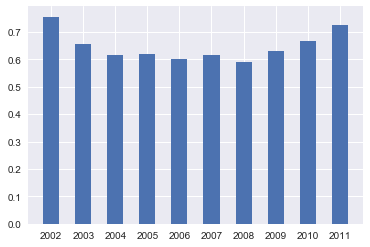

In [21]:
N = len(modularities_yearly)
x = range(N)
width = 1/2
fig, ax = plt.subplots()
ax.set_xticks(np.add(x, 0)) # set the position of the x ticks
ax.set_xticklabels(('2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'))
ax.bar(x, modularities_yearly, width)

The data shows us that their was a small decrease in modularity between 2002 and 2008 but after that it increased again. In 2002 to 2008 the network thus was in decreasing in community strength. More pages started linking to other pages outside their communities instead of linking to other pages in their respective community. From 2008 onwards pages started doing the reverse.

We zoom in on the year 2002 to see what causes the decrease in modularity:

In [22]:
modularities_monthly = generate_monthly_modularity(2002, 1, 12)

<Container object of 12 artists>

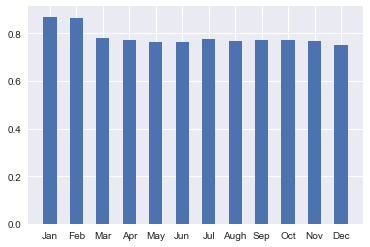

In [23]:
N = len(modularities_monthly)
x = range(N)
width = 1/2
fig, ax = plt.subplots()
ax.set_xticks(np.add(x, 0)) # set the position of the x ticks
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Augh','Sep','Oct', 'Nov', 'Dec'))
ax.bar(x, modularities_monthly, width)

From the data we deduce that in March 2002 the modularity dropped significantly. We zoom in further to March 2002 to find out the reason of it dropping:

In [24]:
modularities_dayly_2 = generate_dayly_modularity(2002, 3)

<Container object of 31 artists>

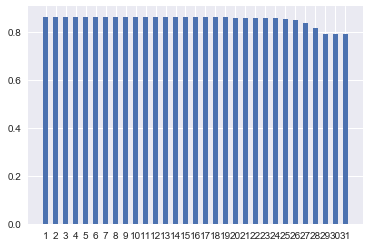

In [25]:
N = len(modularities_dayly_2)
x = range(N)
width = 1/2
fig, ax = plt.subplots()
ax.set_xticks(np.add(x, 0)) # set the position of the x ticks
ax.set_xticklabels(range(1,32))
ax.bar(x, modularities_dayly_2, width)

The data shows a huge decline in the modularity from 25 march up until 30 march. This doesn't necessarily mean that a lot of pages have changed in that particular time period from linking to inside their communities to linking outside their communities. It could also be a result of the community detection algorithm generating a different partition. It could for example divide a big community into two smaller communities. These two smaller communities could still be linked but not enough for the algorithm to consider them as one community. This will result in a decrease in modularity since the two communities linking to eachother are all links to other communities.